# I. Load data from .e

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




<>:1: SyntaxWarning: invalid escape sequence '\,'
<>:1: SyntaxWarning: invalid escape sequence '\,'
C:\Users\aasam\AppData\Local\Temp\ipykernel_17048\3046820845.py:1: SyntaxWarning: invalid escape sequence '\,'
  ''' model 1


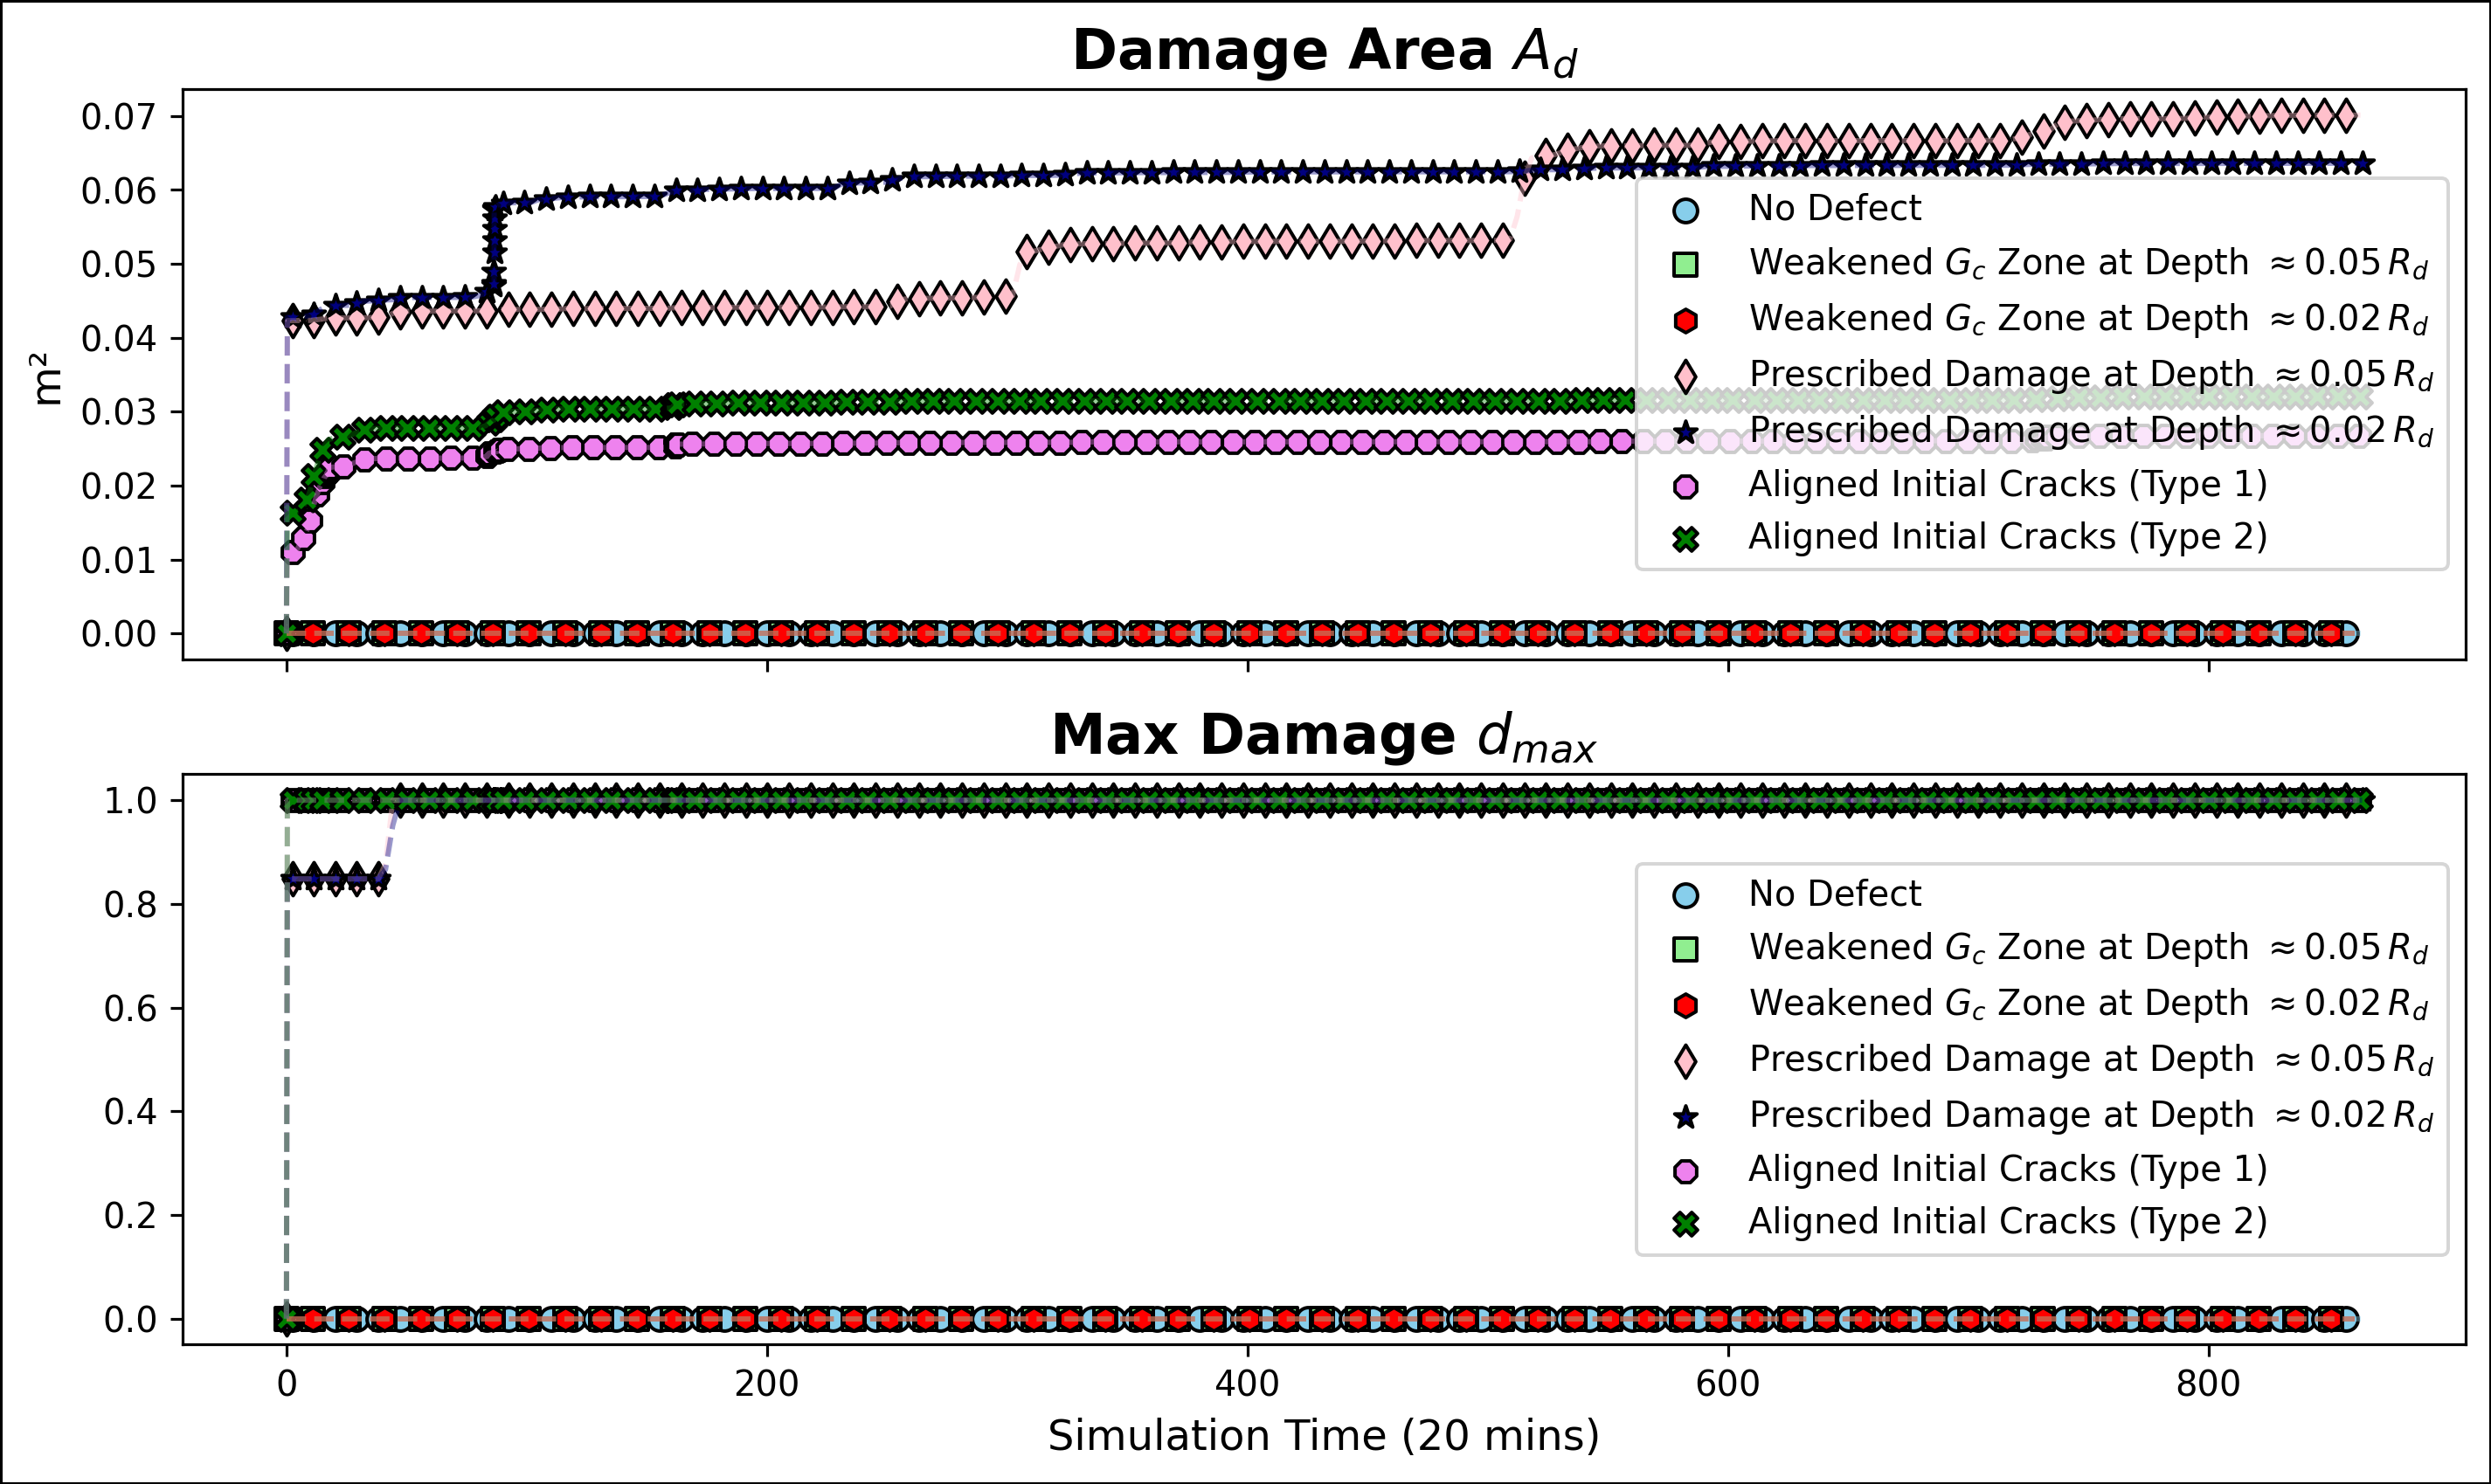

In [9]:

''' model 1
output_list_no_defects=[['simulation_files/No0_intact.csv'],[r"No Defect"]]
output_list_weak_Gc = [
    ['simulation_files/No1_0p95.csv', 'simulation_files/No2_0p98.csv'],
    [
        r"Weakened $G_c$ Zone at Depth $\approx 0.05\,R_d$",
        r"Weakened $G_c$ Zone at Depth $\approx 0.02\,R_d$"
    ]
]

output_list_initd = [
    [
        'simulation_files/No1_0p95_initd.csv',
        'simulation_files/No2_0p98_initd.csv',
        'simulation_files/No3_vert_sections.csv',
        'simulation_files/No3_vert_sections2.csv'
    ],
    [
        r"Prescribed Damage at Depth $\approx 0.05\,R_d$",
        r"Prescribed Damage at Depth $\approx 0.02\,R_d$",
        r"Aligned Initial Cracks (Type 1)",
        r"Aligned Initial Cracks (Type 2)"
    ]
]
output_list=[output_list_no_defects[0]+output_list_weak_Gc[0]+output_list_initd[0]
             ,output_list_no_defects[1]+output_list_weak_Gc[1]+output_list_initd[1]]
'''

output_list_no_defects=[['simulation_files2/No_defects.csv'],[r"No Defect"]]
output_list_weak_Gc = [
    ['simulation_files2/No1_0p95_2.csv','simulation_files2/No2_0p98_2.csv'],
    [
        r"Weakened $G_c$ Zone at Depth $\approx 0.05\,R_d$",
        r"Weakened $G_c$ Zone at Depth $\approx 0.02\,R_d$"
    ]
]

output_list_initd = [
    ['simulation_files2/No1_inidR0p05_2.csv','simulation_files2/No2_inidR0p02_2.csv',
     'simulation_files2/No3_inid_vert8_2.csv','simulation_files2/No4_inid_vert12_2.csv'],
    [
        r"Prescribed Damage at Depth $\approx 0.05\,R_d$",
        r"Prescribed Damage at Depth $\approx 0.02\,R_d$",
        r"Aligned Initial Cracks (Type 1)",
        r"Aligned Initial Cracks (Type 2)"
    ]
]
output_list=[output_list_no_defects[0]+output_list_weak_Gc[0]+output_list_initd[0]
             ,output_list_no_defects[1]+output_list_weak_Gc[1]+output_list_initd[1]]
# **特征名称映射**
feature_labels = {
    "crack_area": r"Damage Area $A_d$",
    "max_d": r"Max Damage $d_{max}$",
}

# **y 轴单位**
unit_labels = {
    "crack_area": "m²",
    "max_d": "",
}

# **左列 (物理量相关)**
left_features = ["crack_area"]
# **右列 (收敛性相关)**
right_features = ["max_d"]
features = left_features + right_features
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 讀入資料 :修改這一行!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dataframes = [pd.read_csv(f) for f in output_list[0]]

# 畫圖設定
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True, dpi=288)
colors = ['skyblue', 'lightgreen', 'red', 'pink', 'navy', 'violet','green']
markers = ['o', 's', 'h', 'd', '*', '8','X' ]

# 畫圖
for i, feature in enumerate(features):
    ax = axes[i]
    for j, df in enumerate(dataframes):
        time = df["time"]
        values = df[feature]
        if feature == "top_stress_yy":
            values = -values  # ✨ 將壓力轉為正值

        skip = 3  # 每隔幾個點畫一個 marker
        ax.scatter(time[::skip], values[::skip], label=output_list[1][j],
                   color=colors[j], marker=markers[j],
                   edgecolors='black', alpha=1, s=45)
        ax.plot(time, values, linestyle="--", color=colors[j], alpha=0.4)

    ax.set_title(feature_labels[feature], fontsize=16, fontweight="bold")
    ax.set_ylabel(unit_labels[feature], fontsize=12)
    ax.legend(loc="best", fontsize=10)

axes[-1].set_xlabel("Simulation Time (20 mins)", fontsize=12)
plt.tight_layout()
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(1.2)
#plt.savefig("ss_curve.png", dpi=300, bbox_inches='tight')
plt.show()



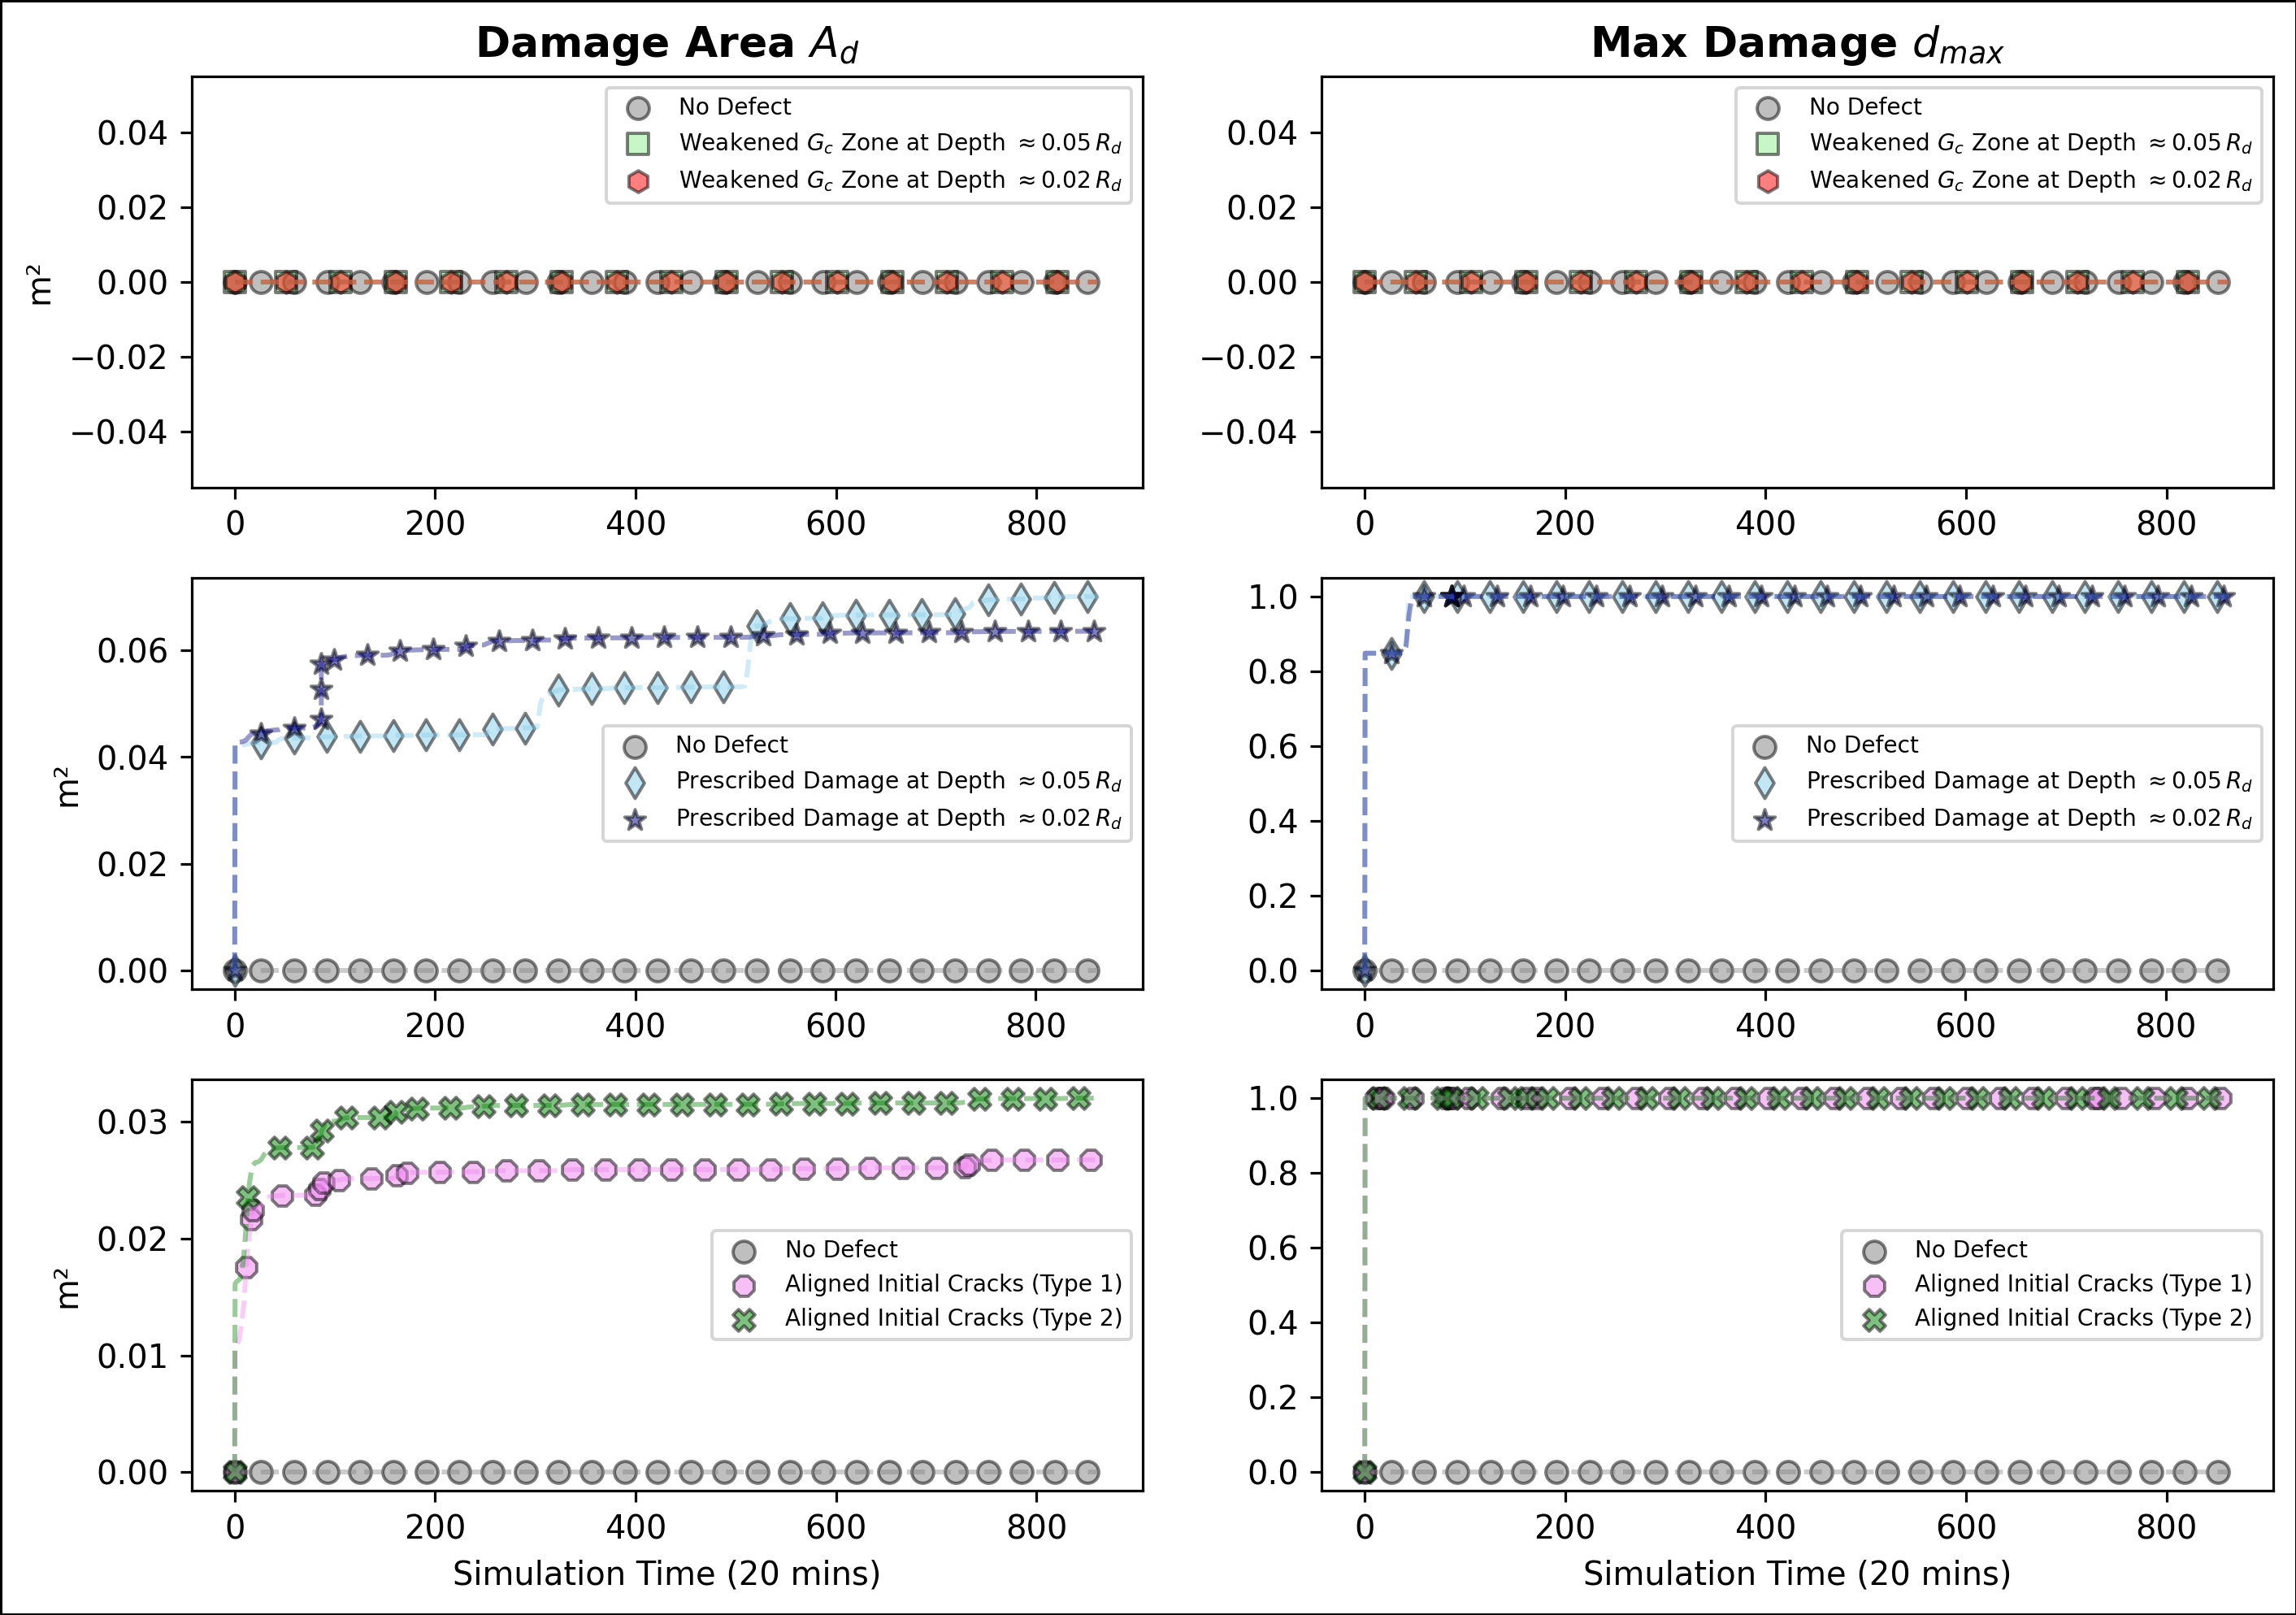

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



colors = ['gray', 'lightgreen', 'red', 'skyblue', 'navy', 'violet', 'green']
markers = ['o', 's', 'h', 'd', '*', '8', 'X']

# === label 映射 ===
feature_labels = {
    "crack_area": r"Damage Area $A_d$",
    "max_d": r"Max Damage $d_{max}$",
}
unit_labels = {
    "crack_area": "m²",
    "max_d": "",
}
features = ["crack_area", "max_d"]

# === 讀資料 ===
dataframes = [pd.read_csv(f) for f in output_list[0]]

# === 分組（每組畫一行） ===
depth_groups = [
    [0, 1, 2],  # 0.03
    [0, 3, 4],  # 0.05
    [0, 5, 6],  # 0.07
]

# === 建立 3x2 subplot 圖 ===
fig, axes = plt.subplots(3, 2, figsize=(10, 7), sharex=False, dpi=288)

for row_idx, group in enumerate(depth_groups):
    for col_idx, feature in enumerate(features):
        ax = axes[row_idx, col_idx]
        for j in group:
            time = dataframes[j]["time"]
            values = dataframes[j][feature]
            skip = 11
            ax.scatter(time[::skip], values[::skip], label=output_list[1][j],
                       color=colors[j], marker=markers[j], edgecolors='black', alpha=0.5, s=45)
            ax.plot(time, values, linestyle="--", color=colors[j], alpha=0.4)

        # 標題與軸標籤
        if row_idx == 0:
            ax.set_title(feature_labels[feature], fontsize=13, fontweight="bold")
        ax.set_ylabel(unit_labels[feature], fontsize=10)
        
        ax.legend(loc="best", fontsize=7)
        if row_idx == 2:
            ax.set_xlabel("Simulation Time (20 mins)", fontsize=10)

# === 外框與格式 ===
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(1.2)
plt.tight_layout()
#plt.subplots_adjust(top=0.9)
#fig.suptitle("Comparison of Defect Depths Across Damage Metrics", fontsize=14, fontweight="bold")
plt.savefig('C:/Users/aasam/Desktop/thermal_report/Figs/weeks_thermal_elastic/model2_damage_area_and_max_d.png')
plt.savefig('C:/Users/aasam/Desktop/thermal_report/svgFigs/weeks_thermal_elastic/model2_damage_area_and_max_d.svg')
plt.show()


In [8]:
len(dataframes)

6

In [6]:
j

6